In [39]:
import random
from datetime import datetime, timedelta

meeting = datetime.strptime("09:05", "%H:%M")
walk_to_bus = timedelta(seconds=300)
walk_to_office = timedelta(seconds=240)
bus_interval = 10
bus_duration_mean = 22  
bus_duration_std = 4    

def simulate_single_journey(departure_from_home: datetime) -> bool:
    time_at_bus_stop = departure_from_home + walk_to_bus 

    minutes = (time_at_bus_stop.hour * 60 + time_at_bus_stop.minute)
    next_bus_minute = minutes + (bus_interval - minutes % bus_interval)
    bus_departure = datetime.combine(departure_from_home.date(), datetime.min.time()) + timedelta(minutes=next_bus_minute)

    ride_duration = timedelta(minutes=13)
    arrival_time = bus_departure + ride_duration + WALK_FROM_BUS

    return arrival_time > meeting  


In [41]:
def simulate_many(departure_time_str: str, n=1000) -> float:
    departure = datetime.strptime(departure_time_str, "%H:%M")
    late_count = sum(simulate_single_journey(departure) for _ in range(n))
    return late_count / n


In [43]:
times = [f"08:{str(m).zfill(2)}" for m in range(0, 51)]  
probabilities = [simulate_many(t) for t in times]


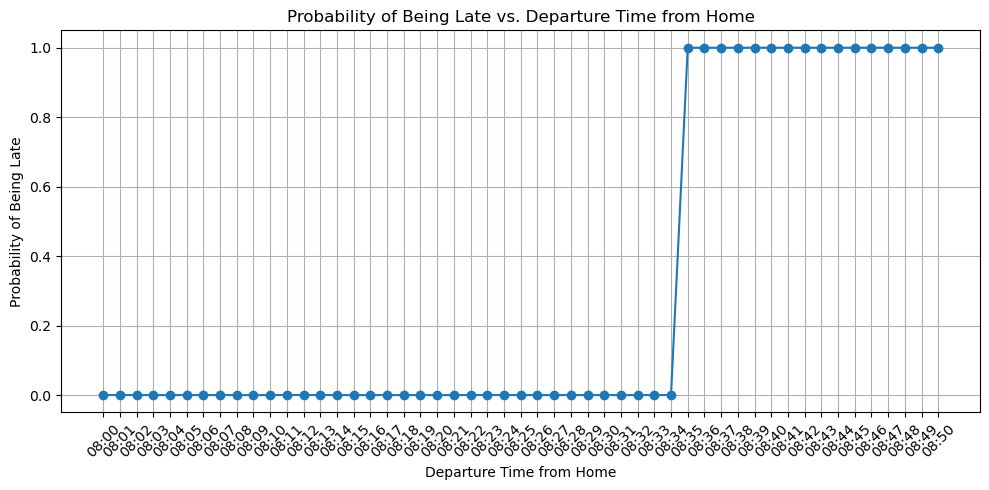

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(times, probabilities, marker='o')
plt.title("Probability of Being Late vs. Departure Time from Home")
plt.xlabel("Departure Time from Home")
plt.ylabel("Probability of Being Late")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
